## Загрузка и ознокомление с предоставленной нам информацией

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth
from plotly import graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
logs_exp = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep='\t')

In [3]:
logs_exp.head(5) # Озанкомились со структурой данных

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
logs_exp.info() # Получили общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


На данном этапе исследования получили общую информацию о данных и их структуре.

## Подготовка данных

### Заменим названия столбцов на удобные.

In [5]:
logs_exp.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id'] # Переименуем названия столбцов

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**

Не стоит переименовывать столбцы через атрибут columns, потому что так ты неявно учитываешь порядок столбцов. Если порядок столбцов поменяется, код перестанет работать. Используй вместо этого метод rename().
    
</div>

In [6]:
logs_exp.head(5) # Проверили результаты

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
logs_exp['exp_id'] = logs_exp['exp_id'].replace({246:'A1', 247:'A2', 248:'B'}) # Переименуем значения в столбце exp_id 
                                                                            # для удобста на названия групп на 'A1', 'A2','B'

Перевели названия столбцов, а так же значения в столбце exp_id на более удобные.

### Проверим пропуски, типы данных, наличие дубликатов.

In [8]:
logs_exp.isna().sum() # Проверим пропуски в данных

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

In [9]:
logs_exp.duplicated().sum() # посчитаем дубликаты

413

Имеются явные дубликаты. Удалим их.

In [10]:
logs_exp = logs_exp.drop_duplicates().reset_index(drop=True)  # Удалим явные дубликаты

In [11]:
logs_exp.duplicated().sum() # Проверим рзультат

0

От явных дубликатов избавились.

Проверим наличие неявных дубликатов

In [12]:
logs_exp['event_name'].unique() 

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

В столбце event_name неявных дубликатов нет.

Проверим, есть ли в столбце exp_id занчения, которые выбиваются из исследования.

In [13]:
logs_exp['exp_id'].unique()

array(['A1', 'B', 'A2'], dtype=object)

В столбце exp_id занчений, которые выбиваются из исследования нет.

### Добавим столбец даты и времени, а также отдельный столбец дат.

Добавим столбец time, в котором будут значения даты и времени

In [14]:
logs_exp['time'] = pd.to_datetime(logs_exp['event_timestamp'], unit = 's') # Создаем сттлбец с датой и временем

In [15]:
logs_exp.head(5) # Проверили результаты.

,event_name,device_id_hash,event_timestamp,exp_id,time
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42


Добавим столбец date, в котором будут значения дат.

In [16]:
logs_exp['date'] = pd.to_datetime(pd.to_datetime(logs_exp['time']).dt.date) # Cоздадим столбец с датами и 
                                                                            # сразу переведем его в формат datetime64

In [17]:
logs_exp.head(5) # Проверили результаты.

,event_name,device_id_hash,event_timestamp,exp_id,time,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25


In [18]:
logs_exp.info() # Проверили результаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  object        
 4   time             243713 non-null  datetime64[ns]
 5   date             243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 11.2+ MB


Проверим, есть ли пользователи, которые попали сразу в несколько групп. Создадим выборки, где есть номера пользователей и группа к которой он относится. Сохраним каждую выборку в отделбную переменную.

In [19]:
orders_a1 = logs_exp.loc[logs_exp['device_id_hash'] == 'A1', ['device_id_hash', 'exp_id']].reset_index(drop=True)

In [20]:
orders_a2 = logs_exp.loc[logs_exp['device_id_hash'] == 'A2', ['device_id_hash', 'exp_id']].reset_index(drop=True)

In [21]:
orders_b = logs_exp.loc[logs_exp['device_id_hash'] == 'B', ['device_id_hash', 'exp_id']].reset_index(drop=True)

In [22]:
orders_a1_a2 = orders_a1.merge(orders_a2, on='device_id_hash') # Присоединим группу А1 к группе А2 по номеру пользователя

Таблица должна содержать номера пользователей, которые есть в обеих группах.

In [23]:
orders_a1_a2

,exp_id_x,device_id_hash,exp_id_y


В группах А1 и А2 нет пользователей с одинаковыми номерами.

In [24]:
orders_a1_b = orders_a1.merge(orders_b, on='device_id_hash')

In [25]:
orders_a1_b

,exp_id_x,device_id_hash,exp_id_y


В группах А1 и В нет пользователей с одинаковыми номерами.

In [26]:
orders_a2_b = orders_a2.merge(orders_b, on='device_id_hash')

In [27]:
orders_a2_b

,exp_id_x,device_id_hash,exp_id_y


В группах А2 и В нет пользователей с одинаковыми номерами.

На данном этапе исследования перевели названия столбцов, а так же значения в столбце exp_id на более удобные. Избавились от явных дубликатов. Проверили данные на пропуски. Проверили наличие неявных дубликатов. Добавили столбец time, в котором будут значения даты и времени, а так же столбец date, в котором будут значения дат. Так же проверили нет ли в данных пользоватей, которые входят в несколько групп.

## Изучение и проверка данных

### Узнаем, сколько всего событий в логе.

Узнаем количество событий в логе.

In [28]:
event_old = logs_exp['event_name'].count()

In [29]:
event_old

243713

Ранее мы определяли наличие неявных дубликатов. Воспользуемся тем же кодом для того, чтобы узнать количество видов событий в исследовнии.

In [30]:
logs_exp['event_name'].unique() 

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Как видим, всего в логе 5 видов событий.

### Узнаем, сколько всего пользователей в логе.

In [31]:
total_id_old = logs_exp['device_id_hash'].nunique() # Выведем количество уникальных значений в стольбце device_id_hash.

In [32]:
total_id_old

7551

Как видим, число пользователей в логе составляет 7551.

### Узнаем, сколько в среднем событий приходится на пользователя.

Для того, чтобы узнать, сколько в среднем событий приходится на пользователя введем переменную logs_exp_mean, в которой сохраним уникальные идентификаторы пользователей с количеством событий, которые на них приходятся.

In [33]:
logs_exp_mean = logs_exp.groupby('device_id_hash').agg({'event_name': 'count'}).sort_values(by='event_name', ascending=False)

In [34]:
logs_exp_mean.reset_index().head(5) # Выведем таблицу с идентификатором и количеством событий.

,device_id_hash,event_name
0,6304868067479728361,2307
1,197027893265565660,1998
2,4623191541214045580,1768
3,6932517045703054087,1439
4,1754140665440434215,1221


In [35]:
round(logs_exp_mean['event_name'].mean()) # Выведем среднее и медиальное количество событий которое приходится 
                                           # на пользователя, округленные до ближайшего целого числа
                                           

32

In [36]:
round(logs_exp_mean['event_name'].median())

20

Как видим, среднее количество событий, которое приходится на пользователя,составляет 32, а медиальное 20. Из таблицы, где было сохранено количество событий на одного пользователя можно заметить, что есть значения, которые намного превышают средний показатель событий.

### Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени.

Найдем максимальную и минимальную дату данных, которыми мы располагаем.

In [37]:
display(logs_exp['time'].min())
logs_exp['time'].max()

Timestamp('2019-07-25 04:43:36')

Timestamp('2019-08-07 21:15:17')

Как видим, минимальной датой исследования будет 2019-07-25 04:43:36, а максимальной 2019-08-07 21:15:17.

Построим гистограмму по дате.

In [38]:
logs_exp.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,time,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25


Построим график по дате.

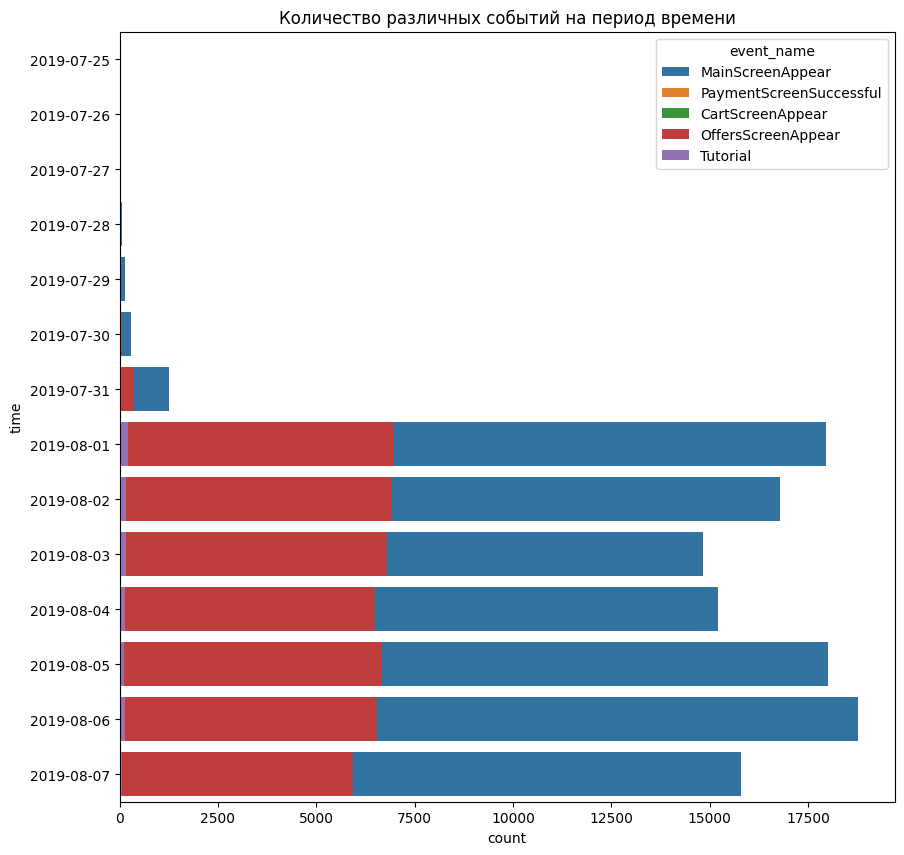

In [39]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y=logs_exp['time'].dt.strftime('%Y-%m-%d'), hue='event_name', data=logs_exp, dodge=False)
ax.set_title('Количество различных событий на период времени')
plt.show()

Для более точной оценки построим график по времени в период с 2019-07-31 12:00:00 по 2019-08-01 12:00:00.

Ввведем переменную logs_exp_part, где сохраним результаты за данный период времени

In [40]:
logs_exp_part = logs_exp.loc[(logs_exp['time'] >= '2019-07-31 12:00:00') & (logs_exp['time'] <= '2019-08-01 12:00:00')]

In [41]:
logs_exp_part.head(5)

,event_name,device_id_hash,event_timestamp,exp_id,time,date
1159,MainScreenAppear,9067318300532694216,1564574451,B,2019-07-31 12:00:51,2019-07-31
1160,CartScreenAppear,1100007125648169445,1564574531,B,2019-07-31 12:02:11,2019-07-31
1161,MainScreenAppear,105724841806923970,1564574633,A1,2019-07-31 12:03:53,2019-07-31
1162,MainScreenAppear,246861536070424367,1564574670,B,2019-07-31 12:04:30,2019-07-31
1163,MainScreenAppear,2336435428072180131,1564574840,A2,2019-07-31 12:07:20,2019-07-31


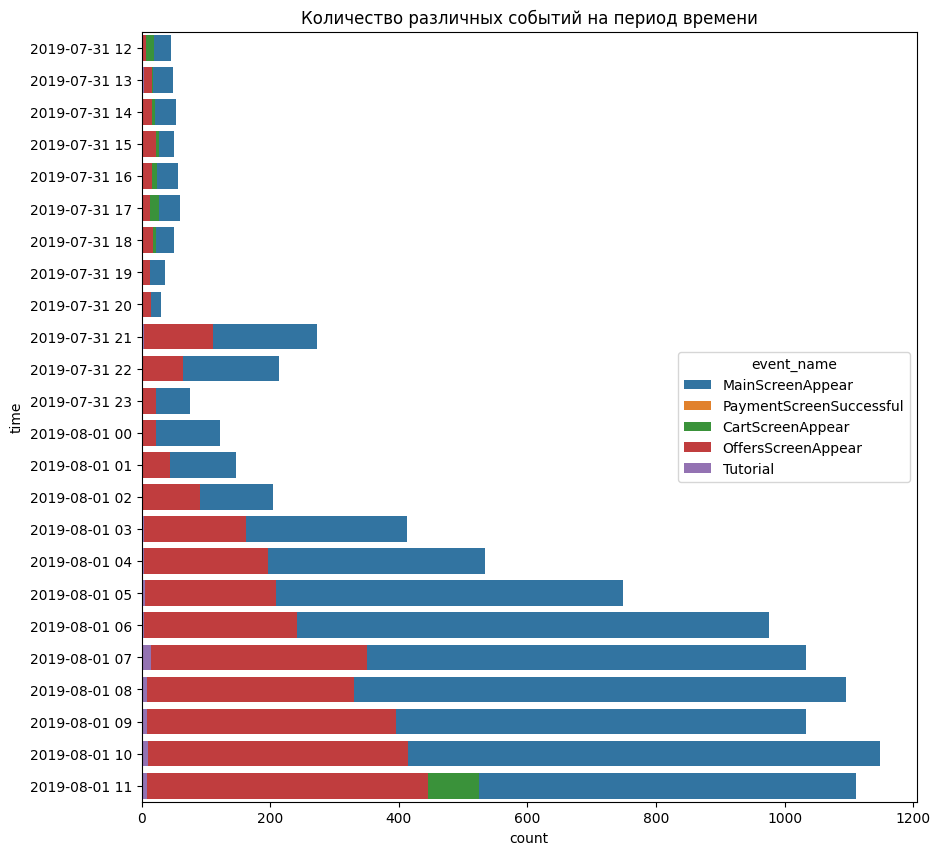

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y=logs_exp_part['time'].dt.strftime('%Y-%m-%d %H'), hue='event_name', data=logs_exp, dodge=False)
ax.set_title('Количество различных событий на период времени')
plt.show()

Как видим из гистограммы, данные можно считать полными именно с 2019-07-31 21:00:00. В период ранее вышеукащзанной даты возможно влияние старых данных. Исходя из этого можно сделать вывод, что мы можем работать только с данными котороые были полученны с 2019-07-31 21:00:00.

Отбросим старые данные и оставим только необходимые нам. 

In [43]:
logs_exp = logs_exp.loc[logs_exp['time'] >= '2019-07-31 21:00:00'] # Отбросим старые значения 

In [44]:
logs_exp = logs_exp.reset_index(drop=True) 

In [45]:
logs_exp.head(5) # Проверим результат

,event_name,device_id_hash,event_timestamp,exp_id,time,date
0,MainScreenAppear,7701922487875823903,1564606857,A2,2019-07-31 21:00:57,2019-07-31
1,MainScreenAppear,2539077412200498909,1564606905,A2,2019-07-31 21:01:45,2019-07-31
2,OffersScreenAppear,3286987355161301427,1564606941,B,2019-07-31 21:02:21,2019-07-31
3,OffersScreenAppear,3187166762535343300,1564606943,A2,2019-07-31 21:02:23,2019-07-31
4,MainScreenAppear,1118952406011435924,1564607005,B,2019-07-31 21:03:25,2019-07-31


Узнаем, какое количество уникальных пользователей были потеряны. 

In [46]:
total_id = logs_exp['device_id_hash'].nunique()

In [47]:
total_id

7538

Изначально, количество уникальных пользователей, без учета старых данных составляло 7551. По исправленным данным количество уникальных пользователей составляет 7538, что не является статистически значимым. 

Узнаем, сколько событий было отброшено

In [48]:
event = logs_exp['event_name'].count()

Изначально, количество событий, без учета старых данных составляло 243713. По исправленным данным количество событий составляет 241724, что не является статистически значимым. 

Посчитаем процентное различие в долях по старым данным и новым данным в количестве событий и количестве пользователей.

In [49]:
event_percent = round((1 - event/event_old)*100, 2)

In [50]:
event_percent # разница в количестве событий между старыми и новыми данными в процентном соотношении

0.82

In [51]:
total_percent = round((1 -total_id/total_id_old)*100, 2)

In [52]:
total_percent # разница в количестве пользователей между старыми и новыми данными в процентном соотношении

0.17

Посчитаем количественное различие по старым и новым данным.

In [53]:
event_count = event_old - event 

In [54]:
event_count # разница в количестве событий между старыми и новыми данными 

1989

In [55]:
total_count = total_id_old - total_id

In [56]:
total_count # разница в количестве пользователей между старыми и новыми данными 

13

Разница между старыми и новыми данными по количеству событий составила 1989. Разница между старыми и новыми данными по количеству пользователей составила 13.

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп в исправленных данных.

In [57]:
logs_exp['exp_id'].unique() # Прверим, какие группы остались

array(['A2', 'B', 'A1'], dtype=object)

Узнаем количество пользователе для каждой группы

In [58]:
logs_exp_a1 = logs_exp.loc[logs_exp['exp_id'] == 'A1'] # выведем данные для группы А1

In [59]:
id_a1 = logs_exp_a1['device_id_hash'].nunique() # Сохраним количество пльзователей в группе А1

In [60]:
id_a1 # выведем количество пользователей в группе А1

2484

In [61]:
logs_exp_a2 = logs_exp.loc[logs_exp['exp_id'] == 'A2'] # выведем данные для группы А2

In [62]:
id_a2 = logs_exp_a2['device_id_hash'].nunique() # Сохраним количество пльзователей в группе А2

In [63]:
id_a2 # выведем количество пользователей в группе А2

2517

In [64]:
logs_exp_b = logs_exp.loc[logs_exp['exp_id'] == 'B'] # выведем данные для группы В

In [65]:
id_b = logs_exp_b['device_id_hash'].nunique() # Сохраним количество пльзователей в группе B

In [66]:
id_b # выведем количество пользователей в группе В

2537

Количество пользователей по группам, совершивших какие - либо действия, распределилось так: А1 - 2484, А2 - 2517, В - 2537. 

Пересчитаем среднее количество и медиальное количество событий на пользователя по измениашимся данным.

In [67]:
logs_exp_mean_new = logs_exp.groupby('device_id_hash').agg({'event_name': 'count'}).sort_values(by='event_name', ascending=False)

In [68]:
round(logs_exp_mean_new['event_name'].mean())

32

In [69]:
round(logs_exp_mean_new['event_name'].median())

19

На данном этапе исследования было установлено, что среднее количество событий, которое приходится на пользователя,составляет 32, а медиальное 20. По обновленным данным, среднее количество событий, которое приходится на пользователя,составляет 32, а медиальное 19.  Из таблицы, где было сохранено количество событий на одного пользователя можно заметить, что есть значения, которые намного превышают средний показатель событий. Было установлено, что данные можно считать полными именно с 2019-07-31 21:00:00. В период ранее вышеуказанной даты возможно влияние старых данных. Исходя из этого можно сделать вывод, что мы можем работать только с данными котороые были полученны с 2019-07-31 21:00:00. С учетом этого были отброшены данные события которых были ранее 2019-07-31 21:00:00. Изначально, количество уникальных пользователей, без учета старых данных составляло 7551. По исправленным данным количество уникальных пользователей составляет 7538 и составляет примерно 0.17% разницы, что не является статистически значимым. Изначально, количество событий, без учета старых данных составляло 243713. По исправленным данным количество событий составляет 241724 и составляет примерно 0.82% разницы, что не является статистически значимым. Разница между старыми и новыми данными по количеству событий составила 1989. Разница между старыми и новыми данными по количеству пользователей составила 13. Количество пользователей по группам, совершивших какие - либо действия, по новым данным, распределилось так: А1 - 2484, А2 - 2517, В - 2537. 

## Изучим воронку событий

### Посмотрим, какие события есть в логах, как часто они встречаются.

In [70]:
logs_exp_name = logs_exp.groupby('event_name').agg({'event_name': 'count'}) # Сгруппируем и посчитаем количество событий

In [71]:
logs_exp_name.columns = ['count'] # Переименуем на нужное нам название 

In [72]:
logs_exp_name.reset_index().sort_values('count', ascending=False).reset_index(drop=True)#Сбросим индекс,отсортируем по 
                                                                        #  убыванию, пронумеруем индексы обратно
                                                                                        

,event_name,count
0,MainScreenAppear,117889
1,OffersScreenAppear,46531
2,CartScreenAppear,42343
3,PaymentScreenSuccessful,33951
4,Tutorial,1010


Как видим, наиболее частое событие MainScreenAppear. Далее идет OffersScreenAppear, потом CartScreenAppear, за ним PaymentScreenSuccessful и замыкает Tutorial.

### Посчитаем, сколько пользователей совершали каждое из этих событий. Посчитаем долю пользователей, которые хоть раз совершали событие.

Посчитаем количество пользователей, которые совершали каждое из событий. Результат сохраним в переменной count_id

In [73]:
count_id = logs_exp.groupby('event_name').agg({'device_id_hash': 'nunique'})

In [74]:
count_id.reset_index().sort_values(by='device_id_hash', ascending=False).reset_index(drop=True)#Сбросим индекс,отсортируем 
                                                                                # по убыванию, пронумеруем индексы обратно 

,event_name,device_id_hash
0,MainScreenAppear,7423
1,OffersScreenAppear,4597
2,CartScreenAppear,3736
3,PaymentScreenSuccessful,3540
4,Tutorial,843


Как видим, больше всего пользователей совершало событие MainScreenAppear - 7423, далее OffersScreenAppear - 4597, далее CartScreenAppear - 3736, далее PaymentScreenSuccessful - 3540 и замыкает Tutorial - 843.

Посчитаем долю пользователей, которые хоть раз совершали событие. Сохраним процент данных пользователей в столбце percent_id. Ранее мы узнали, что общее количество пользователей 7538.

In [75]:
count_id['percent_id'] = round(count_id['device_id_hash']/total_id*100, 2) # получим процентную долю 
                                                                      # от общего количества пользователей

In [76]:
count_id = count_id.reset_index().sort_values(by='device_id_hash', ascending=False).reset_index(drop=True)

In [77]:
count_id

,event_name,device_id_hash,percent_id
0,MainScreenAppear,7423,98.47
1,OffersScreenAppear,4597,60.98
2,CartScreenAppear,3736,49.56
3,PaymentScreenSuccessful,3540,46.96
4,Tutorial,843,11.18


Доли пользователей, которые хоть раз совершали событие: 98.47/60.98/49.56/46.96/11.18 соответсвенно для MainScreenAppear/OffersScreenAppear/CartScreenAppear/PaymentScreenSuccessful/Tutorial.

### Предположим, в каком порядке происходят события. Выясним, все ли они выстраиваются в последовательную цепочку.

Скорее всего, события происходят в данной последовательности:
1. MainScreenAppear, где, скорее всего, появляется главая страница 
2. OffersScreenAppear, где, скорее всего, появляется страница с товаром  
3. CartScreenAppear, где, скорее всего, появляется страница с купленным товаром  
4. PaymentScreenSuccessful, где, скорее всего, появляется страница с оплатой    
5. Событие Tutorial, где, скорее всего, содержится информация о том, как пользоваться приложением, не может быть выстроена в последовательную цепочку, так как вопросы о пользовании приложения могут возникнуть на любом этапе.

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки.

Расчитаем, какая доля пользователей проходит на следующий шаг воронки. Для расчета создадим новый столбец, last_percent в датафрейме count_id. При этом, удалим строку Tutorial, так как она не может быть встроена в последовательную цепочку событий.

In [78]:
count_id = count_id.loc[: 3] # Уберем строку Tutorial

In [79]:
count_id

,event_name,device_id_hash,percent_id
0,MainScreenAppear,7423,98.47
1,OffersScreenAppear,4597,60.98
2,CartScreenAppear,3736,49.56
3,PaymentScreenSuccessful,3540,46.96


In [80]:
count_id['last_percent'] = round(count_id['device_id_hash']/
                           count_id['device_id_hash'].shift(1) * 100, 2) # посчитаем, какая доля пользователей 
                                                                         # проходит на следующий шаг воронки

C:\Users\HP-work\AppData\Local\Temp\ipykernel_6468\1532999516.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
count_id # выведем значения

,event_name,device_id_hash,percent_id,last_percent
0,MainScreenAppear,7423,98.47,NaN
1,OffersScreenAppear,4597,60.98,61.93
2,CartScreenAppear,3736,49.56,81.27
3,PaymentScreenSuccessful,3540,46.96,94.75


Изобразим графически, какая доля пользователей проходит на следующий шаг воронки.

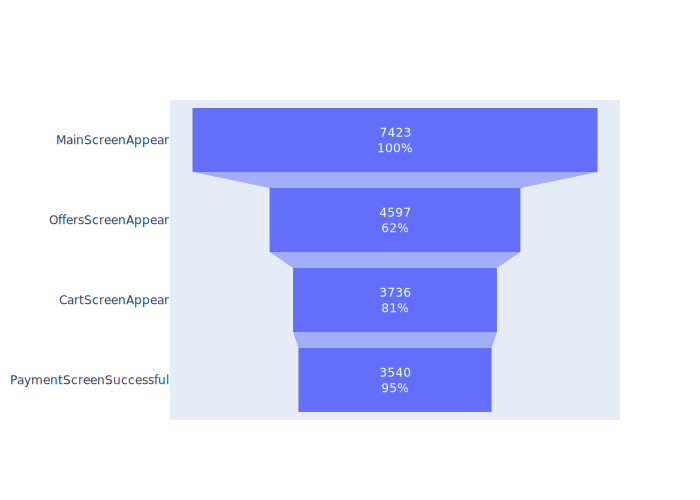

In [82]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'last_percent',
    y = count_id['event_name'],
    x = count_id['device_id_hash'],
    textposition = "inside",
    textinfo = "value+percent previous"))

Как видим, больше всего пользователей, примерно 38%, теряется при переходе от события MainScreenAppear к событию OffersScreenAppear. Возможно это связано с нестабильной работой приложения, либо неудобным интерфейсом приложения.

Расчитаем, какая доля пользователей доходит от первого события до оплаты.

In [83]:
percent_pay = count_id.loc[3, 'device_id_hash']/count_id.loc[0, 'device_id_hash'] * 100

In [84]:
round(percent_pay, 2) # Выведем значение 

47.69

Как видим, общая доля пользователей, которая доходит от первого события до оплаты равна 47.69 %. 

На данном этапе исследования были сделаны следующие выводы:  
* наиболее частое событие MainScreenAppear. Далее идет OffersScreenAppear, потом CartScreenAppear, за ним PaymentScreenSuccessful и замыкает Tutorial  
* больше всего пользователей совершало событие MainScreenAppear - 7423, далее OffersScreenAppear - 4597, далее CartScreenAppear - 3736, далее PaymentScreenSuccessful - 3540 и замыкает Tutorial - 843 
* доли пользователей, которые хоть раз совершали событие: 98.47/60.98/49.56/46.96/11.18 соответсвенно для MainScreenAppear/OffersScreenAppear/CartScreenAppear/PaymentScreenSuccessful/Tutorial. 
* Скорее всего, события происходят в данной последовательности:
1. MainScreenAppear, где, скорее всего, появляется главая страница 
2. OffersScreenAppear, где, скорее всего, появляется страница с товаром  
3. CartScreenAppear, где, скорее всего, появляется страница с купленным товаром  
4. PaymentScreenSuccessful, где, скорее всего, появляется страница с оплатой    
5. Событие Tutorial, где, скорее всего, содержится информация о том, как пользоваться приложением, не может быть выстроена в последовательную цепочку, так как вопросы о пользовании приложения могут возникнуть на любом этапе  
* больше всего пользователей, примерно 38%, теряется при переходе от события MainScreenAppear к событию OffersScreenAppear. Возможно это связано с нестабильной работой приложения, либо неудобным интерфейсом приложения  
* общая доля пользователей, которая доходит от первого события до оплаты равна 47.69 %


## Изучим результаты эксперимента.

### Выясним, сколько пользователей в каждой экспериментальной группе.

Ранее было расчино, что количество пользователей по группам, совершивших какие - либо действия, распределилось так: А1 - 2484, А2 - 2517, В - 2537. 

Перед анализом удалим события Tutorial.

In [85]:
logs_exp = logs_exp.query('event_name != "Tutorial"').reset_index()

### Проверим, находят ли статистические критерии разницу между выборками.

In [86]:
event_pivot=logs_exp.pivot_table(index=['event_name','exp_id'], values='device_id_hash', 
aggfunc=['count', 'nunique']).reset_index() # Получим общую таблицу количества уникальных пользователей по событиям 
                                            # в группах и количество событий в этих группах
event_pivot.columns= ['event_name','exp_id', 'n_events', 'n_users'] # Переименуем столбцы

In [87]:
event_pivot # Просмотрим таблицу

,event_name,exp_id,n_events,n_users
0,CartScreenAppear,A1,14697,1266
1,CartScreenAppear,A2,12439,1239
2,CartScreenAppear,B,15207,1231
3,MainScreenAppear,A1,37855,2450
4,MainScreenAppear,A2,39294,2479
5,MainScreenAppear,B,40740,2494
6,OffersScreenAppear,A1,14829,1542
7,OffersScreenAppear,A2,15237,1524
8,OffersScreenAppear,B,16465,1531
9,PaymentScreenSuccessful,A1,11858,1200


Выведем количество пользователей по событиям в каждой группе

In [88]:
group_a1 = event_pivot.query('exp_id == "A1"').sort_values(by='n_users', ascending=False).reset_index(drop=True)

In [89]:
group_a1.drop(['exp_id', 'n_events'], axis= 1 , inplace= True ) 

In [90]:
group_a1.columns = ['event_name', 'count_a1']

In [91]:
group_a1 # Количество пользователей по событим в группе А1

,event_name,count_a1
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [92]:
group_a2 = event_pivot.query('exp_id == "A2"').sort_values(by='n_users', ascending=False).reset_index(drop=True)

In [93]:
group_a2.drop(['exp_id', 'n_events'], axis= 1 , inplace= True ) 

In [94]:
group_a2.columns = ['event_name', 'count_a2']

In [95]:
group_a2 # Количество пользователей по событим в группе А2

,event_name,count_a2
0,MainScreenAppear,2479
1,OffersScreenAppear,1524
2,CartScreenAppear,1239
3,PaymentScreenSuccessful,1158


In [96]:
group_b = event_pivot.query('exp_id == "B"').sort_values(by='n_users', ascending=False).reset_index(drop=True)

In [97]:
group_b.drop(['exp_id', 'n_events'], axis= 1 , inplace= True ) 

In [98]:
group_b.columns = ['event_name', 'count_b']

In [99]:
group_b # Количество пользователей по событим в группе В

,event_name,count_b
0,MainScreenAppear,2494
1,OffersScreenAppear,1531
2,CartScreenAppear,1231
3,PaymentScreenSuccessful,1182


Создадим переменную group_a1_a2, где сохраним суммарные значения групп A1 и A2.

In [100]:
group_a1_a2 = group_a1.merge(group_a2, on='event_name')

In [101]:
group_a1_a2

,event_name,count_a1,count_a2
0,MainScreenAppear,2450,2479
1,OffersScreenAppear,1542,1524
2,CartScreenAppear,1266,1239
3,PaymentScreenSuccessful,1200,1158


In [102]:
group_a1_a2['count_a1_a2'] = group_a1_a2['count_a1'] + group_a1_a2['count_a2']

In [103]:
group_a1_a2 

,event_name,count_a1,count_a2,count_a1_a2
0,MainScreenAppear,2450,2479,4929
1,OffersScreenAppear,1542,1524,3066
2,CartScreenAppear,1266,1239,2505
3,PaymentScreenSuccessful,1200,1158,2358


Построим воронку событий по всем группам.

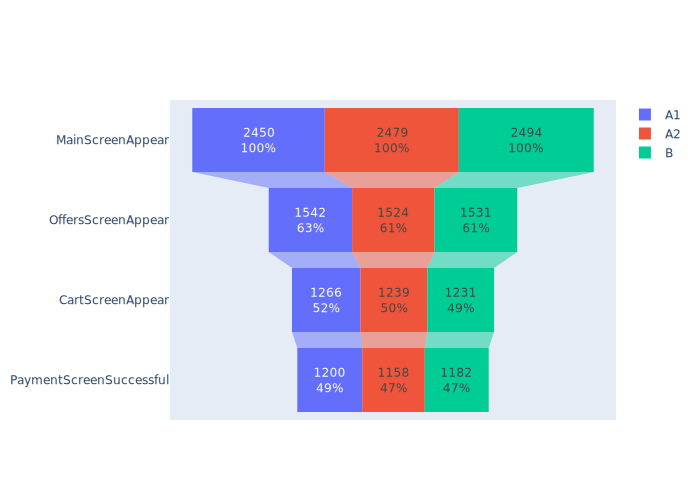

In [104]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A1',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a1'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'A2',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a2'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = group_a1_a2['event_name'],
    x = group_b['count_b'],
    textinfo = "value+percent initial"))
fig.show("svg")

У нас в распоряжении имеются 3 группы пользователей. Внутри каждой группы имеется деление пользователей по совершенным ими действиям в определенной последвательности. Исходя из данной последовательности, мы имеем долю каждого совершенного действия пользователями каждой из групп. Соостветственно  мы можем проверить гипотезу о равенстве долей в данной последовательности в каждой из групп. Для проверки данной гипотезы воспользуемся z-тестом. При проверке выберем статистическую значимость равную 0.05.
Сформулируем нулевую и альтернативную гипотезу для проверки равенства долей в событиях в группах. Нулевая гипотеза - между долями нет статистически значимой разницы. Альтернативная - между долями есть статистическая разница. 
Проверим данные гипотезы для групп А1 и А2 в разрезе каждого из событий.

In [105]:
def z_value_diff(first_group, second_group, alpha,  third_group, fourth_group):
   
    successes = [first_group, second_group]
    trials = [third_group, fourth_group]

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
 
    # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])) # ваш код

    distr = st.norm(0, 1) # ваш код

    p_value = (1 - distr.cdf(abs(z_value))) * 2 # ваш код

    print('p-значение: ', p_value)

    if p_value < alpha: # ваш код
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [106]:
z_value_diff(group_a1_a2.loc[0,'count_a1'], group_a1_a2.loc[0,'count_a2'], 0.05, id_a1, id_a2)

p-значение:  0.6756217702005545
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию MainScreenAppear не получилось отвергнуть нулевую гипотезу.

In [107]:
z_value_diff(group_a1_a2.loc[1,'count_a1'], group_a1_a2.loc[1,'count_a2'], 0.05, id_a1, id_a2)

p-значение:  0.26698769175859516
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию OffersScreenAppear не получилось отвергнуть нулевую гипотезу.

In [108]:
z_value_diff(group_a1_a2.loc[2,'count_a1'], group_a1_a2.loc[2,'count_a2'], 0.05, id_a1, id_a2)

p-значение:  0.2182812140633792
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию CartScreenAppear не получилось отвергнуть нулевую гипотезу.

In [109]:
z_value_diff(group_a1_a2.loc[3,'count_a1'], group_a1_a2.loc[3,'count_a2'], 0.05, id_a1, id_a2)

p-значение:  0.10298394982948822
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию PaymentScreenSuccessful не получилось отвергнуть нулевую гипотезу.

Так как у нас множественный тест с одними и теми же данными можно было бы применить методы корректировки значения требуемого уровня значимости, но так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.

Построим воронку событий по группам А1 и А 2

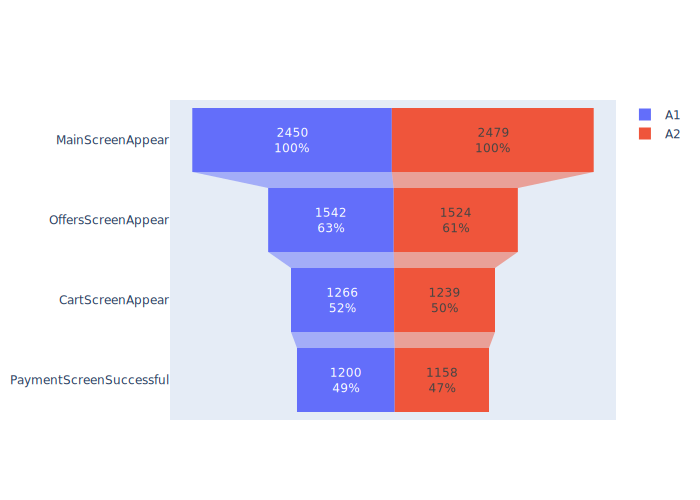

In [110]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A1',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a1'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'A2',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a2'],
    textinfo = "value+percent initial"))

fig.show()

Ни для оного из событий разница не оказалось значимой обе эти группы можно считать контрольными.

Теперь проверим статистическую разницу между группами А1 и В.

In [111]:
z_value_diff(group_a1_a2.loc[0,'count_a1'], group_b.loc[0,'count_b'], 0.05, id_a1, id_b)

p-значение:  0.34705881021236484
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию MainScreenAppear не получилось отвергнуть нулевую гипотезу.

In [112]:
z_value_diff(group_a1_a2.loc[1,'count_a1'], group_b.loc[1,'count_b'], 0.05, id_a1, id_b)

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию OffersScreenAppear не получилось отвергнуть нулевую гипотезу.

In [113]:
z_value_diff(group_a1_a2.loc[2,'count_a1'], group_b.loc[2,'count_b'], 0.05, id_a1, id_b)

p-значение:  0.08328412977507749
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию CartScreenAppear не получилось отвергнуть нулевую гипотезу.

In [114]:
z_value_diff(group_a1_a2.loc[3,'count_a1'], group_b.loc[3,'count_b'], 0.05, id_a1, id_b)

p-значение:  0.22269358994682742
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию PaymentScreenSuccessful не получилось отвергнуть нулевую гипотезу.

Так как у нас множественный тест с одними и теми же данными можно было бы применить методы корректировки значения требуемого уровня значимости, но так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.

Построим воронку событий по группам А1 и В

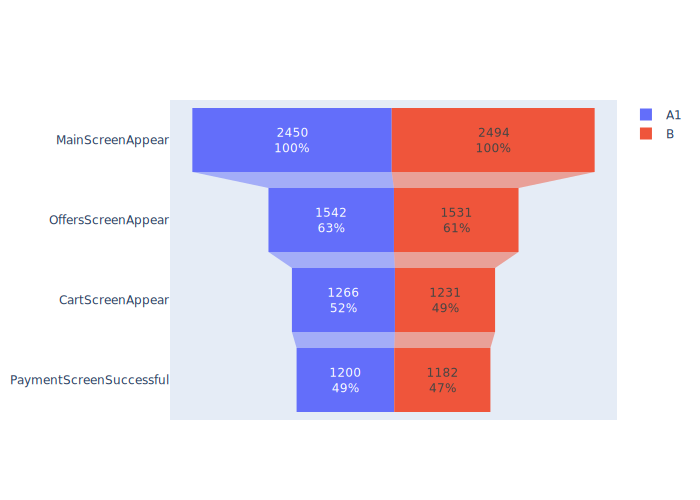

In [115]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A1',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a1'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = group_a1_a2['event_name'],
    x = group_b['count_b'],
    textinfo = "value+percent initial"))
fig.show()

Значимой разницы между контрольной группой А1 и экспериментальной группой не выявлено.

Теперь проверим статистическую разницу между группами А2 и В.

In [116]:
z_value_diff(group_a1_a2.loc[0,'count_a2'], group_b.loc[0,'count_b'], 0.05, id_a2, id_b)

p-значение:  0.6001661582453706
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию MainScreenAppear не получилось отвергнуть нулевую гипотезу.

In [117]:
z_value_diff(group_a1_a2.loc[1,'count_a2'], group_b.loc[1,'count_b'], 0.05, id_a2, id_b)

p-значение:  0.8835956656016957
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию OffersScreenAppear не получилось отвергнуть нулевую гипотезу.

In [118]:
z_value_diff(group_a1_a2.loc[2,'count_a2'], group_b.loc[2,'count_b'], 0.05, id_a2, id_b)

p-значение:  0.6169517476996997
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию CartScreenAppear не получилось отвергнуть нулевую гипотезу.

In [119]:
z_value_diff(group_a1_a2.loc[3,'count_a2'], group_b.loc[3,'count_b'], 0.05, id_a2, id_b)

p-значение:  0.6775413642906454
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию PaymentScreenSuccessful не получилось отвергнуть нулевую гипотезу.

Так как у нас множественный тест с одними и теми же данными можно было бы применить методы корректировки значения требуемого уровня значимости, но так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.

Построим воронку событий по группам А2 и В

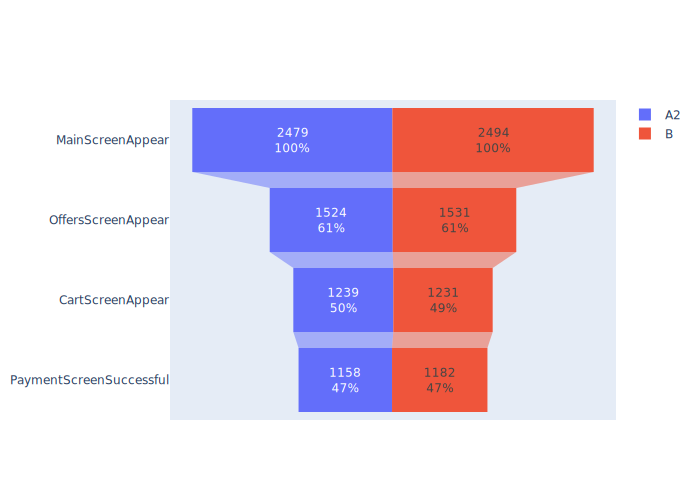

In [120]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A2',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a2'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = group_a1_a2['event_name'],
    x = group_b['count_b'],
    textinfo = "value+percent initial"))
fig.show()

Значимой разницы между контрольной группой А2 и экспериментальной группой не выявлено.

Теперь проверим статистическую разницу между группами А1+A2 и В.

In [121]:
z_value_diff(group_a1_a2.loc[0,'count_a1']+group_a1_a2.loc[0,'count_a2'], group_b.loc[0,'count_b'], 0.05,id_a1+id_a2, id_b)

p-значение:  0.39298914928006035
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию MainScreenAppear не получилось отвергнуть нулевую гипотезу.

In [122]:
z_value_diff(group_a1_a2.loc[1,'count_a1']+group_a1_a2.loc[1,'count_a2'], group_b.loc[1,'count_b'], 0.05,id_a1+id_a2, id_b)

p-значение:  0.418998284007599
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию OffersScreenAppear не получилось отвергнуть нулевую гипотезу.

In [123]:
z_value_diff(group_a1_a2.loc[2,'count_a1']+group_a1_a2.loc[2,'count_a2'], group_b.loc[2,'count_b'], 0.05,id_a1+id_a2, id_b)

p-значение:  0.19819340844527744
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию CartScreenAppear не получилось отвергнуть нулевую гипотезу.

In [124]:
z_value_diff(group_a1_a2.loc[3,'count_a1']+group_a1_a2.loc[3,'count_a2'], group_b.loc[3,'count_b'], 0.05,id_a1+id_a2, id_b)

p-значение:  0.6452057673098244
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию PaymentScreenSuccessful не получилось отвергнуть нулевую гипотезу.

Так как у нас множественный тест с одними и теми же данными можно было бы применить методы корректировки значения требуемого уровня значимости, но так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.

Построим воронку событий по группам А1+А2 и В

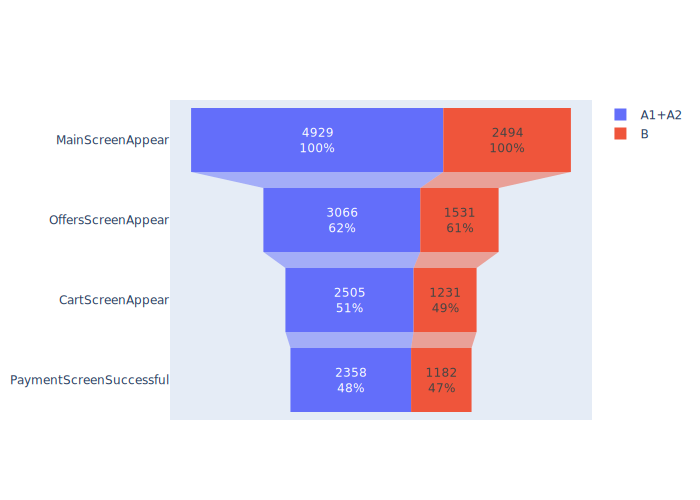

In [125]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A1+А2',
    y = group_a1_a2['event_name'],
    x = group_a1_a2['count_a1_a2'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = group_a1_a2['event_name'],
    x = group_b['count_b'],
    textinfo = "value+percent initial"))
fig.show()

Сравнение результатов с объединенной контрольной группой также не показало значимой разницы.

Всего было сделано 16 проверок статистических гипотез с уровнем значимости 0.05. По итогам анализа конторольных групп с эспериментальной группой статистически значимой разницы средних долей по событиям найдено не было, поэтому причин отвергать нулевую гипотезу о том, что между долями проверяемых групп нет статистически значимой разницы, не найдены. При уровне значимости 0.1 только одна из проверок покажет значимую разницу, между контрольной группой А1 и В в доле перехода пользователей в корзину(CartScreenAppear), но эта разница будет не в пользу нашей экспериментальной группы. Но при уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05. Исходя из результатов данного A/A/B-эксперимента, мы можем судить, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Что можно считать успехом, т.к. целью было узнать не отпугнут ли изменения пользователей. В то же время учитывая результаты эксперимента, если изменение шрифта не продиктовано проблемами в работе приложения, его можно не менять.

## Общий вывод

__Выполняя проект, были проделаны следующие работы:__  
1. Загрузка и ознакомление с данными
2. Подготовка данных, а именно:  
  * Замена названия столбцов на удобные 
  * Проверим пропуски, типы данных, наличие дубликатов 
  * Добавлены столбцы даты и времени, а также отдельный столбец дат 
3.  Изучение и проверка данных, а именно:
  * Узнали, сколько всего событий в логе 
  * Узнали, сколько всего пользователей в логе 
  * Узнали, сколько в среднем событий приходится на пользователя 
  * Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени 
4. Изучили воронку событий, а именно: 
  * Посмотрели, какие события есть в логах, как часто они встречаются 
  * Посчитали, сколько пользователей совершали каждое из этих событий. Посчитали долю пользователей, которые хоть раз совершали событие 
  * По воронке событий посчитали, какая доля пользователей проходит на следующий шаг воронки 
5.   Изучили результаты эксперимента, а именно: 
  * Выяснили, сколько пользователей в каждой экспериментальной группе 
  * Проверили, находят ли статистические критерии разницу между выборками

__Выполняя проект, были сделаны следующие выводы:__   
1. В изначальных данных имеются явные дубликаты.  
2. Всего в логе 5 видов событий.  
3. Было установлено, что среднее количество событий, которое приходится на пользователя,составляет 32, а медиальное 20. По обновленным данным, среднее количество событий, которое приходится на пользователя,составляет 32, а медиальное 19. Из таблицы, где было сохранено количество событий на одного пользователя можно заметить, что есть значения, которые намного превышают средний показатель событий. Было установлено, что данные можно считать полными именно с 2019-07-31 21:00:00. В период ранее вышеуказанной даты возможно влияние старых данных. Исходя из этого можно сделать вывод, что мы можем работать только с данными котороые были полученны с 2019-07-31 21:00:00. С учетом этого были отброшены данные события которых были ранее 2019-07-31 21:00:00. Изначально, количество уникальных пользователей, без учета старых данных составляло 7551. По исправленным данным количество уникальных пользователей составляет 7538, что не является статистически значимым. Изначально, количество событий, без учета старых данных составляло 243713. По исправленным данным количество событий составляет 241724, что не является статистически значимым. Количество пользователей по группам, совершивших какие - либо действия, по новым данным, распределилось так: А1 - 2484, А2 - 2517, В - 2537.  
4. Наиболее частое событие MainScreenAppear. Далее идет OffersScreenAppear, потом CartScreenAppear, за ним PaymentScreenSuccessful и замыкает Tutorial.  
5. больше всего пользователей совершало событие MainScreenAppear - 7423, далее OffersScreenAppear - 4597, далее CartScreenAppear - 3736, далее PaymentScreenSuccessful - 3540 и замыкает Tutorial - 843.  
6. Доли пользователей, которые хоть раз совершали событие: 98.47/60.98/49.56/46.96/11.18 соответсвенно для MainScreenAppear/OffersScreenAppear/CartScreenAppear/PaymentScreenSuccessful/Tutorial.  
7. Скорее всего, события происходят в данной последовательности:  
  * MainScreenAppear, где, скорее всего, появляется главая страница  
  * OffersScreenAppear, где, скорее всего, появляется страница с товаром  
  * CartScreenAppear, где, скорее всего, появляется страница с купленным товаром  
  * PaymentScreenSuccessful, где, скорее всего, появляется страница с оплатой  
  * Событие Tutorial, где, скорее всего, содержится информация о том, как пользоваться приложением, не может быть выстроена в последовательную цепочку, так как вопросы о пользовании приложения могут возникнуть на любом этапе  
8. Больше всего пользователей, примерно 38%, теряется при переходе от события MainScreenAppear к событию OffersScreenAppear. Возможно это связано с нестабильной работой приложения, либо неудобным интерфейсом приложения  
9. Общая доля пользователей, которая доходит от первого события до оплаты равна 47.69 %  
10. Всего было сделано 16 проверок статистических гипотез с уровнем значимости 0.05. По итогам анализа контрольных групп с экспериментальной группой статистически значимой разницы средних долей по событиям найдено не было, поэтому причин отвергать нулевую гипотезу о том, что между долями проверяемых групп нет статистически значимой разницы, не найдены. При уровне значимости 0.1 только одна из проверок покажет значимую разницу, между контрольной группой А1 и В в доле перехода пользователей в корзину(CartScreenAppear), но эта разница будет не в пользу нашей экспериментальной группы. Но при уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05. Исходя из результатов данного A/A/B-эксперимента, мы можем судить, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Что можно считать успехом, т.к. целью было узнать не отпугнут ли изменения пользователей. В то же время учитывая результаты эксперимента, если изменение шрифта не продиктовано проблемами в работе приложения, его можно не менять. 
11. Применение методов корректировки значения требуемого уровня значимости, в данном эксперименет не требуется  так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.